In [1]:

import numpy as np
import pandas as pd
import plotly.express as px
from plotly.offline import plot
import matplotlib.pyplot as plt
import plotly.graph_objects as go


pol_insta = pd.read_csv("/home/milton/Documentos/khorda_data/lomeli/insta/coments_result.csv", usecols=["polaridad"])

pol_tiktok = pd.read_csv("/home/milton/Documentos/khorda_data/lomeli/tiktok/coments_result.csv", usecols=["polaridad"])

pol_x = pd.read_csv("/home/milton/Documentos/khorda_data/lomeli/twitter/df_coments_complete.csv", usecols=["polaridad"])

polaridad = pd.concat([pol_insta, pol_tiktok, pol_x], axis=0)

polaridad.to_csv("polaridad.csv")

In [7]:
pol_insta = pd.read_csv("/home/milton/Documentos/khorda_data/lomeli/general/posts_result_insta.csv", usecols=["polaridad"])
pol_fb = pd.read_csv("/home/milton/Documentos/khorda_data/lomeli/general/posts_result_fb.csv", usecols=["polaridad"])
pol_x = pd.read_csv("/home/milton/Documentos/khorda_data/lomeli/general/posts_result_x.csv", usecols=["polaridad"])
polaridad = pd.concat([pol_insta, pol_tiktok, pol_x], axis=0)

polaridad.to_csv("polaridad_posts.csv")

In [9]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=polaridad.polaridad, histnorm='probability', marker_color='blue'))
# Personalizar el diseño y agregar elementos visuales
fig.update_layout(
    title_text="Distribución de Polaridad",
    xaxis_title="Polaridad",
    yaxis_title="Frecuencia",
    xaxis=dict(showline=True, showgrid=False),
    yaxis=dict(showline=True, showgrid=False),
    plot_bgcolor='grey',
    bargap=0.0,  # Espaciado entre barras
    bargroupgap=0.0,  # Espaciado entre grupos de barras
    showlegend=False  # No mostrar leyenda
)

# Añadir un título de fuente
fig.add_annotation(
    text="Histograma de Polaridad",
    xref="paper", yref="paper",
    x=0.5, y=1.02,
    showarrow=False,
    font=dict(size=16)
)
fig.show()

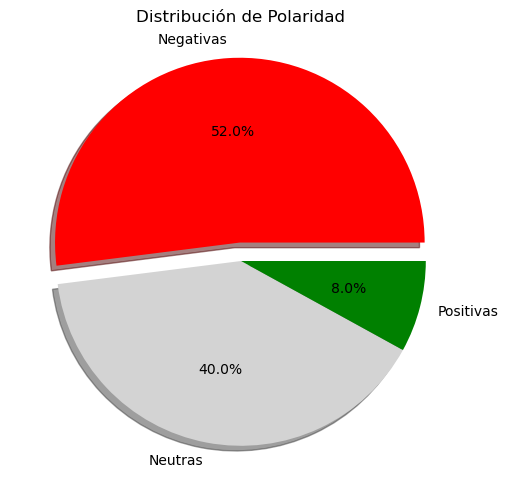

In [14]:
polaridad.describe()
mediana = np.median(polaridad)

# Clasificar las polaridades en negativas, neutras y positivas
negativas = polaridad[(polaridad['polaridad'] > 0.32)]
neutras = polaridad[(polaridad['polaridad'] > 0.33) & (polaridad['polaridad'] <= 0.63)]
positivas = polaridad[(polaridad['polaridad'] > 0.63)]


# Contar cuántos elementos hay en cada categoría
num_negativas = len(negativas)
num_neutras = len(neutras)
num_positivas = len(positivas)

# Crear la gráfica de pastel
labels = ['Negativas', 'Neutras', 'Positivas']
sizes = [num_negativas, num_neutras, num_positivas]
colors = ['red', 'lightgray', 'green']
explode = (0.1, 0, 0)  # Para resaltar la categoría de negativas

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True)
plt.title('Distribución de Polaridad')
plt.show()
